# My WIP career switch into Data Science & an overview on energy consumption forecasting in Ticino

## Quick intro about myself

Yes, my past life consisted in pretty much being some sort of entrepreneur, leveraging my hands-on approach to come up, build and execute business ideas. And yes again, among all tasks, when I think about when it all started 6 years ago (and later on), **I’ve always found data and what’s beneath just fascinating**. For this reason, towards the end of last year, **I decided to throw myself** into the data science world by enrolling into a 480 hours full-time **data science certificate** at Constructor Learning (former SIT Learning) in Zürich. If you are reading this you are already in my GitHub. Just in case you are not used to it, you can find my projects and some topics I've been reviewing lately [here](https://github.com/mikjf?tab=repositories). From there just select one and scroll down to find out what I've been working on lately.

## What makes data science interesting to me

Data is one of the most precious assets within an organization, but it turns out to be meaningless until its conversion into valuable information. While both data analysts and data scientists focus on **extrapolating knowledge** and derive insights **to maximize the value of data**, data scientists, at least to my knowledge, also **tackle the way in which data is gathered, manipulated and further analysed** through scientific methods, processes, algorithms and modelling techniques. Its's exactly this **willingness to be curious and dig further** to truly understand what's happning at a deeper level that makes this job just fascinating.

## From data wrangling to smart data-driven decisions

I'm creating this notebook today as I'm interested in the **Data Scientist position at Azienda Elettrica di Massagno (AEM) SA**. Among a multitude of more complex ongoing challenges that AEM is trying to solve, one that might be suitable for my application to this job is a "simple" energy consumption forecasting for the Ticino region. **My idea is to get the energy consumpation data** from the Energy Statistic Switzerland **2018-2022** available [here](https://www.swissgrid.ch/en/home/customers/topics/energy-data-ch.html) on **swissgrid.ch** and run an **LSTM deep learning model** with python.

## Note

As mentioned in my repository, what's coming next is based on external sources. My goal for this notebook is to recreate a walkthrough while trying to understand the concepts behind deep learning and LSTM.

## Load data and formatting

In [1]:
# import pandas
import pandas as pd

# loading csv data and display
df_2018 = pd.read_csv('data/EnergieUebersichtTI2018.csv')
df_2019 = pd.read_csv('data/EnergieUebersichtTI2019.csv')
df_2020 = pd.read_csv('data/EnergieUebersichtTI2020.csv')
df_2021 = pd.read_csv('data/EnergieUebersichtTI2021.csv')
df_2022 = pd.read_csv('data/EnergieUebersichtTI2022.csv')

In [2]:
# df shape check -> 2020 has 29feb as well (366 days)
df_2018.shape, df_2019.shape, df_2020.shape, df_2021.shape, df_2022.shape

((35040, 2), (35040, 2), (35136, 2), (35040, 2), (35040, 2))

In [3]:
# noticed different datetime format to solve separately

# df_2018 column rename and convert todatetime dtype
df_2018 = df_2018.rename(columns={'Datetime': 'datetime', 'Consumption kWh (Ticino)': 'ti_kwh'})
df_2018['datetime'] = pd.to_datetime(df_2018['datetime'], format='%d.%m.%y %H:%M')

# df_2019 column rename and convert todatetime dtype
df_2019 = df_2019.rename(columns={'Datetime': 'datetime', 'Consumption kWh (Ticino)': 'ti_kwh'})
df_2019['datetime'] = pd.to_datetime(df_2019['datetime'], format='%d.%m.%y %H:%M')

# df_2020 column rename and convert todatetime dtype
df_2020 = df_2020.rename(columns={'Datetime': 'datetime', 'Consumption kWh (Ticino)': 'ti_kwh'})
df_2020['datetime'] = pd.to_datetime(df_2020['datetime'], format='%d.%m.%y %H:%M')

# df_2021 column rename and convert todatetime dtype
df_2021 = df_2021.rename(columns={'Datetime': 'datetime', 'Consumption kWh (Ticino)': 'ti_kwh'})
df_2021['datetime'] = pd.to_datetime(df_2021['datetime'], format='%d.%m.%Y %H:%M')

# df_2022 column rename and convert todatetime dtype
df_2022 = df_2022.rename(columns={'Datetime': 'datetime', 'Consumption kWh (Ticino)': 'ti_kwh'})
df_2022['datetime'] = pd.to_datetime(df_2022['datetime'], format='%d.%m.%Y %H:%M')

In [4]:
# concatenate into single dataframe
df = pd.concat([df_2018, df_2019, df_2020, df_2021, df_2022], ignore_index=True)

In [5]:
# new dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  175296 non-null  datetime64[ns]
 1   ti_kwh    175296 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.7 MB


In [6]:
# shift the 'datetime' column back by 15 minutes to represent the start of the interval
df['datetime'] = df['datetime'] - pd.Timedelta(minutes=15)

In [7]:
# check dataframe format
df.head()

,datetime,ti_kwh
0,2018-01-01 00:00:00,108827.161
1,2018-01-01 00:15:00,109968.509
2,2018-01-01 00:30:00,109160.760
3,2018-01-01 00:45:00,107748.164
4,2018-01-01 01:00:00,109260.469


In [8]:
df.tail()

,datetime,ti_kwh
175291,2022-12-31 22:45:00,100036.434
175292,2022-12-31 23:00:00,99045.343
175293,2022-12-31 23:15:00,98311.819
175294,2022-12-31 23:30:00,97833.531
175295,2022-12-31 23:45:00,95042.765


In [9]:
# group energy consumption by hour (00:00:00 is the total between 00:00 and 00:59:59)
df = df.groupby(pd.Grouper(key='datetime', freq='H')).sum()

# display updated dataframe
df.head()

,ti_kwh
datetime,
2018-01-01 00:00:00,435704.594
2018-01-01 01:00:00,431889.124
2018-01-01 02:00:00,415967.872
2018-01-01 03:00:00,400936.125
2018-01-01 04:00:00,397349.342


In [10]:
# check last rows of dataframe
df.tail()

,ti_kwh
datetime,
2022-12-31 19:00:00,396942.185
2022-12-31 20:00:00,435183.955
2022-12-31 21:00:00,413463.642
2022-12-31 22:00:00,406609.550
2022-12-31 23:00:00,390233.458


<Axes: xlabel='datetime'>

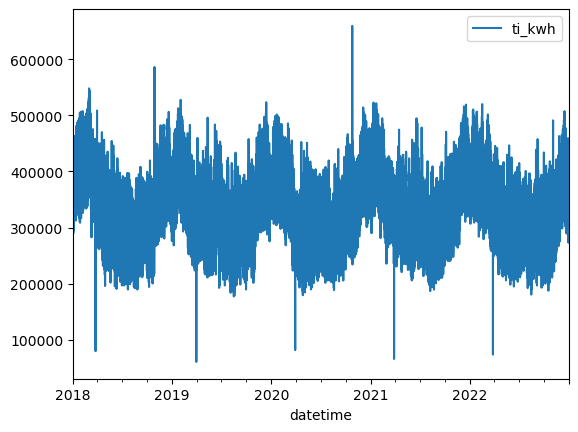

In [11]:
# quick energy consumption plot by year (2018-2022)
df.plot()

In [12]:
# seems like this extreme low values are given by the DST change (02:00am to 03:00pm)
top_min_consumption = df.nsmallest(5, 'ti_kwh').sort_values(by='datetime')
top_min_consumption

,ti_kwh
datetime,
2018-03-25 02:00:00,79750.432
2019-03-31 02:00:00,60484.535
2020-03-29 02:00:00,81624.311
2021-03-28 02:00:00,65867.433
2022-03-27 02:00:00,73564.820


## Create lag function concept

We want to estimate a **function that explains the current values of energy consumption based on 'p' lags of the same energy consumption**. We therefore need to convert the time series into an X and Y matrices for the deep learning model to work. Let's see how it would look like with **p = 3**.

In [13]:
# import numpy package
import numpy as np

# create X and Y matrices for time series list to be used to deep learning model training
def create_X_Y(ts: list, lag: int) -> tuple:

    # emtpy matrices setup
    X, Y = [], []

    # append values with lags to X and Y
    if len(ts) - lag <= 0:
        X.append(ts)
    else:
        for i in range(len(ts) - lag):
            Y.append(ts[i + lag])
            X.append(ts[i:(i + lag)])

    # X and Y numpy arrays
    X, Y = np.array(X), np.array(Y)

    # reshape X array to an LSTM input shape
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    return X, Y

## LSTM input layer and output layer

In [ ]:
# import deep learning packages
from keras.models import Sequential
from keras.layers import LSTM, Dense

# define number of neuruos for LSTM layer
n_layer = 50

# define lags to be used in time series
n_lag = 3

# define model
model = Sequential()
model.add(LSTM(n_layer, activation='relu', input_shape=(n_lag, 1)))
model.add(Dense(1))

# define objective functions -> min. mse (mean squared error)
model.compile(optimizer='adam', loss='mse')

## Complete deep learning model code

This is a cool prebuilt deep learning model code that includes everything we need to run it, including the code just showed above.

In [15]:
# import pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# import deep learning packages (same as above)
from keras.models import Sequential
from keras.layers import LSTM, Dense

# class to create a deep time series model
class DeepModelTS():

    def __init__(
        self, 
        data: pd.DataFrame, 
        Y_var: str,
        lag: int,
        LSTM_layer_depth: int, 
        epochs=10, 
        batch_size=256,
        train_test_split=0
    ):

        self.data = data 
        self.Y_var = Y_var 
        self.lag = lag 
        self.LSTM_layer_depth = LSTM_layer_depth
        self.batch_size = batch_size
        self.epochs = epochs
        self.train_test_split = train_test_split
    
    # create X and Y matrices for time series list to be used to deep learning model training
    @staticmethod
    def create_X_Y(ts: list, lag: int) -> tuple:

        # emtpy matrices setup
        X, Y = [], []

        # append values with lags to X and Y
        if len(ts) - lag <= 0:
            X.append(ts)
        else:
            for i in range(len(ts) - lag):
                Y.append(ts[i + lag])
                X.append(ts[i:(i + lag)])

        # X and Y numpy arrays
        X, Y = np.array(X), np.array(Y)

        # reshape X array to an LSTM input shape
        X = np.reshape(X, (X.shape[0], X.shape[1], 1))

        return X, Y         

    # create data for the neural network model
    def create_data_for_NN(
        self,
        use_last_n=None
        ):

        # extract the main variable we want to forecast
        y = self.data[self.Y_var].tolist()

        # subset time series if needed
        if use_last_n is not None:
            y = y[-use_last_n:]

        # X matrix to include lags of Y
        X, Y = self.create_X_Y(y, self.lag)

        # create train test split
        X_train = X
        X_test = []

        Y_train = Y
        Y_test = []

        if self.train_test_split > 0:
            index = round(len(X) * self.train_test_split)
            X_train = X[:(len(X) - index)]
            X_test = X[-index:]     
            
            Y_train = Y[:(len(X) - index)]
            Y_test = Y[-index:]

        return X_train, X_test, Y_train, Y_test

    # fit the LSTM model
    def LSTModel(self):

        # get data
        X_train, X_test, Y_train, Y_test = self.create_data_for_NN()

        # define model
        model = Sequential()
        model.add(LSTM(self.LSTM_layer_depth, activation='relu', input_shape=(self.lag, 1)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        # define model parameter dictionary
        keras_dict = {
            'x': X_train,
            'y': Y_train,
            'batch_size': self.batch_size,
            'epochs': self.epochs,
            'shuffle': False
        }

        if self.train_test_split > 0:
            keras_dict.update({
                'validation_data': (X_test, Y_test)
            })

        # fit model
        model.fit(
            **keras_dict
        )

        # save model to class 
        self.model = model

        return model

    # predict using test data used for creating the class
    def predict(self) -> list:

        yhat = []

        if(self.train_test_split > 0):
        
            # get last n time series
            _, X_test, _, _ = self.create_data_for_NN()        

            # create prediction list
            yhat = [y[0] for y in self.model.predict(X_test)]

        return yhat

    # predict n time steps ahead
    def predict_n_ahead(self, n_ahead: int):
 
        X, _, _, _ = self.create_data_for_NN(use_last_n=self.lag)        

        # create prediction list
        yhat = []

        for _ in range(n_ahead):
            
            # make prediction
            fc = self.model.predict(X)
            yhat.append(fc)

            # create new input matrix for forecasting
            X = np.append(X, fc)

            # omit first variable
            X = np.delete(X, 0)

            # reshape for next iteration
            X = np.reshape(X, (1, len(X), 1))

        return yhat

## Model initiation lag = 12

In [16]:
# initiate deep model
deep_learner = DeepModelTS(
    
    #dataframe
    data = df,
    
    # Y variable
    Y_var = 'ti_kwh',
    
    # n lags
    lag = 12,

    # layer depth
    LSTM_layer_depth = 50,

    # number of epochs
    epochs = 10,

    # batch size
    batch_size = 128,
    
    # train test split %
    train_test_split = 0.15
)

In [17]:
# model fit
model = deep_learner.LSTModel()

Epoch 1/10
291/291 [==============================] - 2s 5ms/step - loss: 20201824256.0000 - val_loss: 4265303040.0000
Epoch 2/10
291/291 [==============================] - 1s 4ms/step - loss: 4971844096.0000 - val_loss: 3129776640.0000
Epoch 3/10
291/291 [==============================] - 1s 4ms/step - loss: 2907367936.0000 - val_loss: 2284400896.0000
Epoch 4/10
291/291 [==============================] - 1s 4ms/step - loss: 2064742528.0000 - val_loss: 1979064832.0000
Epoch 5/10
291/291 [==============================] - 1s 5ms/step - loss: 2018379264.0000 - val_loss: 2236615168.0000
Epoch 6/10
291/291 [==============================] - 1s 5ms/step - loss: 2095407616.0000 - val_loss: 2006571264.0000
Epoch 7/10
291/291 [==============================] - 1s 4ms/step - loss: 1595623680.0000 - val_loss: 1699570176.0000
Epoch 8/10
291/291 [==============================] - 1s 4ms/step - loss: 5147565568.0000 - val_loss: 20012376064.0000
Epoch 9/10
291/291 [==============================] - 

## Forecast

In [18]:
# define lag used to train the model
lag_model = 12

# get last period
ts = df['ti_kwh'].tail(lag_model).values.tolist()

# create X matrix for the model
X, _ = deep_learner.create_X_Y(ts, lag=lag_model)

# forecast result
yhat = model.predict(X)

1/1 [==============================] - 0s 95ms/step


## Compare forecast and test values

206/206 [==============================] - 0s 986us/step


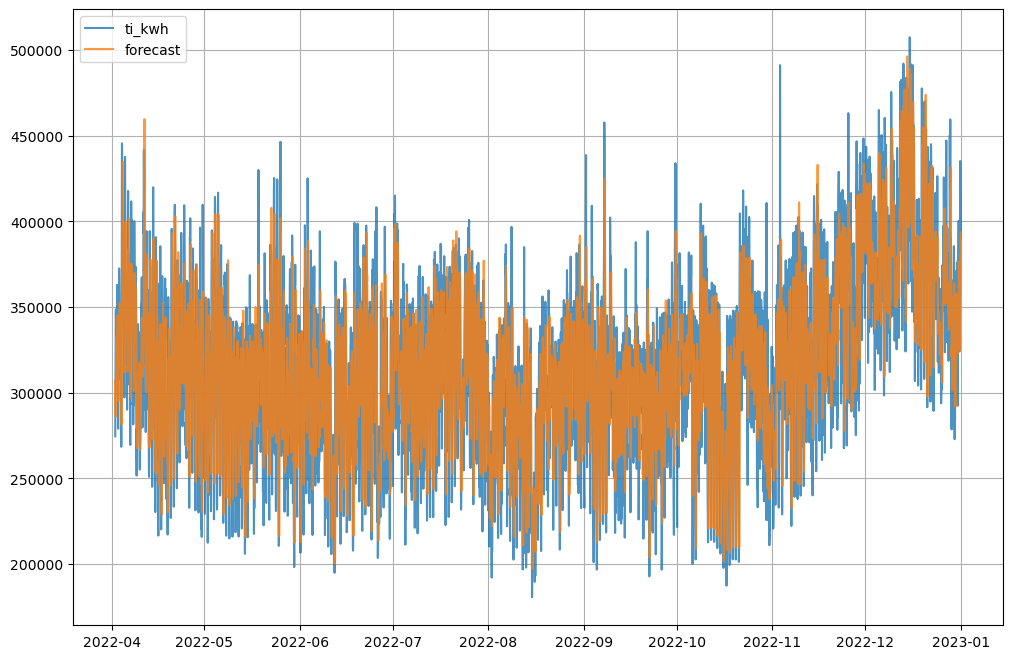

In [19]:
# import matplotlib package
import matplotlib.pyplot as plt

# data split in train test -> predict same values that are in the test set to compare
yhat = deep_learner.predict()

# create forecast dataframe
fc = df.tail(len(yhat)).copy()
fc.reset_index(inplace=True)
fc['forecast'] = yhat

# plot forecast to actual ti_kwh values for test data
plt.figure(figsize=(12, 8))
for dtype in ['ti_kwh', 'forecast']:
  plt.plot(
    'datetime',
    dtype,
    data=fc,
    label=dtype,
    alpha=0.8
  )
plt.legend()
plt.grid()
plt.show()

From the plot we can see that **the forecast of the last 15% of the data that was hidden from the model is pretty similar to the real test values**. Once got to this point, it's only a matter of deciding how far in the future we want our forecast to go.

## Final thoughts

As previously mentioned, the objective for this notebook was to forecast energy consumption for the Ticino region in Switzerland. Thanks to the walkthrough I was able to create a LSTM deep learning model with a train test split but I did not get to forecasting the future periods. I think I'll need more time as I was facing some issues the datetime. Thanks!